## Section I : Vancouver Crimes of 2018 -  Real world data set from Kaggle

#### Data set URL: https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2

In [8]:
import numpy as np
import pandas as pd

In [9]:
!pip install opencage #install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
from opencage.geocoder import OpenCageGeocode

In [10]:
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
import matplotlib.cm as cm
import matplotlib.colors as colors # Matplotlib and associated plotting modules

In [12]:
! pip install folium==0.5.0
import folium # plotting library

In [13]:

import requests #request web pages by making get requests to FourSquare REST Client

from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Libraries imported


#### Using 2018 crime report only. Transform the data into pandas dataframe

In [16]:
van_crime_df = pd.read_csv('https://raw.githubusercontent.com/RamanujaSVL/Coursera_Capstone/master/vancouver_crime_records_2018.csv', index_col=None)

#Dropping X,Y which represents Lat, Lng data as Coordinates, the data seems to be corrupt
van_crime_df.drop(['Unnamed: 0','MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

van_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighborhood'] # rename & changed to lowercase
van_crime_df.head(8)

,Type,Year,Month,Day,Hour,Neighborhood
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District
5,Break and Enter Commercial,2018,2,17,15,Central Business District
6,Break and Enter Commercial,2018,5,16,17,Hastings-Sunrise
7,Break and Enter Commercial,2018,3,2,3,West End


In [17]:
van_crime_df['Neighborhood'].value_counts()

Central Business District    10857
West End                      3031
Mount Pleasant                2396
Strathcona                    1987
Kitsilano                     1802
Fairview                      1795
Renfrew-Collingwood           1762
Grandview-Woodland            1761
Kensington-Cedar Cottage      1391
Hastings-Sunrise              1270
Sunset                         967
Riley Park                     866
Marpole                        828
Victoria-Fraserview            600
Killarney                      565
Oakridge                       499
Dunbar-Southlands              474
Kerrisdale                     417
Shaughnessy                    414
West Point Grey                372
Arbutus Ridge                  311
South Cambie                   292
Stanley Park                   154
Musqueam                        17
Name: Neighborhood, dtype: int64

### Above presented the total count of crimes in various neighborhoods in Vancouver.

## Section II : Using Wikipedia page for getting additional info about the neighborhood.

### In the data set of Borough the neighborhood was part of, so it was not categorized. To solve this point , we will create a dictionary of Neighborhood and based on data in the following Wikipedia page. Link - https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver

In [18]:
column_names = ['Neighborhood', 'Borough'] # define the dataframe columns

# instantiate the dataframe
van_neigh_bor = pd.DataFrame(columns=column_names)

van_neigh_bor['Neighborhood'] = van_crime_df['Neighborhood'].unique()

neigh_bor_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neigh_bor_dict, van_neigh_bor['Neighborhood']):
  van_neigh_bor.loc[van_neigh_bor.Neighborhood == row, 'Borough'] = neigh_bor_dict.get(row)

van_neigh_bor.dropna(inplace=True)

print("There are total Neighborhood =",len(van_neigh_bor['Neighborhood']),"There are total Borough =",len(van_neigh_bor['Borough'].unique()))

van_neigh_bor.head(10)

There are total Neighborhood = 24 There are total Borough = 4


,Neighborhood,Borough
0,West End,Central
1,Central Business District,Central
2,Hastings-Sunrise,East Side
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side
5,Strathcona,East Side
6,Shaughnessy,West Side
7,Sunset,East Side
8,Fairview,West Side
9,Oakridge,West Side


In [19]:
# Merge crime data table to include Boroughs
van_boroughs_crime = pd.merge(van_crime_df,van_neigh_bor, on='Neighborhood')

van_boroughs_crime.head()

,Type,Year,Month,Day,Hour,Neighborhood,Borough
0,Break and Enter Commercial,2018,3,2,6,West End,Central
1,Break and Enter Commercial,2018,6,16,18,West End,Central
2,Break and Enter Commercial,2018,12,12,0,West End,Central
3,Break and Enter Commercial,2018,3,2,3,West End,Central
4,Break and Enter Commercial,2018,3,17,11,West End,Central


In [20]:
# Dropping rows with invalid data
van_boroughs_crime.dropna(inplace=True)
van_boroughs_crime['Borough'].value_counts()

Central            14042
East Side          12400
West Side           7204
South Vancouver     1182
Name: Borough, dtype: int64

### Exploratory Data Analysis

In [21]:
# using Pivot to show data by crimes per borough

van_crime_Type = pd.pivot_table(van_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
van_crime_Type

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

In [22]:
# Merging more columns
van_crime_Type.reset_index(inplace = True)
van_crime_Type.columns = van_crime_Type.columns.map(''.join)
van_crime_Type.rename(columns={'YearAll':'Total'}, inplace=True)

van_crime_Type = van_crime_Type.head(4) # To ignore bottom All in Borough
van_crime_Type

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


In [23]:
# using Pivot to show data by crimes per neighborhood

van_crime_neigh = pd.pivot_table(van_boroughs_crime,
                               values=['Year'],
                               index=['Neighborhood'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)


van_crime_neigh.reset_index(inplace = True)
van_crime_neigh.columns = van_crime_neigh.columns.map(''.join)
van_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)

van_crime_neigh.head()

,Neighborhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
2,Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
3,Fairview,138,73,233,297,692,245,55,0,62,1795
4,Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761


In [24]:
# sorting the data by highest number of crimes per neighborhood

van_crime_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_neigh_top3 = van_crime_neigh.iloc[1:4]
crime_neigh_top3


,Neighborhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
22,West End,230,72,460,455,1461,203,77,1,72,3031
11,Mount Pleasant,205,124,353,493,822,232,67,0,100,2396


### Lowest Crime Count per neighborhood

In [25]:
# sorting the data by 5 LOWEST number of crimes per neighborhood

crime_neigh_low = van_crime_neigh.tail(5)
crime_neigh_low

,Neighborhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,18,71,50,11,157,32,11,0,22,372
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
17,South Cambie,22,42,41,38,111,19,8,0,11,292
18,Stanley Park,6,2,8,0,109,14,3,0,12,154
12,Musqueam,0,4,3,0,4,2,2,0,2,17


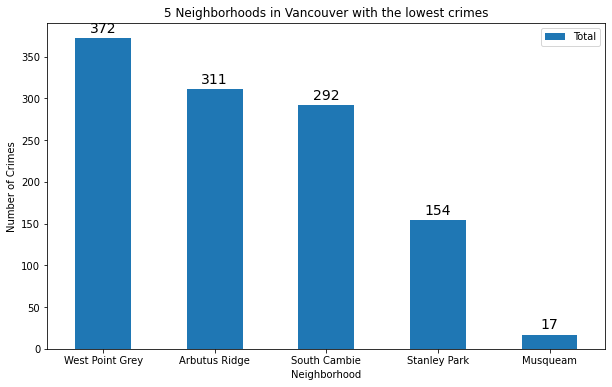

In [26]:
# Lowest number of crime in chart

per_neigh = crime_neigh_low[['Neighborhood','Total']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('5 Neighborhoods in Vancouver with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Crime Count per borough

In [27]:
# 

van_crime_Type = pd.pivot_table(van_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)

van_crime_Type.reset_index(inplace = True)
van_crime_Type.columns = van_crime_Type.columns.map(''.join)
van_crime_Type.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break and Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)
# To ignore bottom All in Borough
van_crime_Type = van_crime_Type.head(4)
van_crime_Type

,Borough,Break and Enter Commercial,Break and Enter Residential,Mischief,Other,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


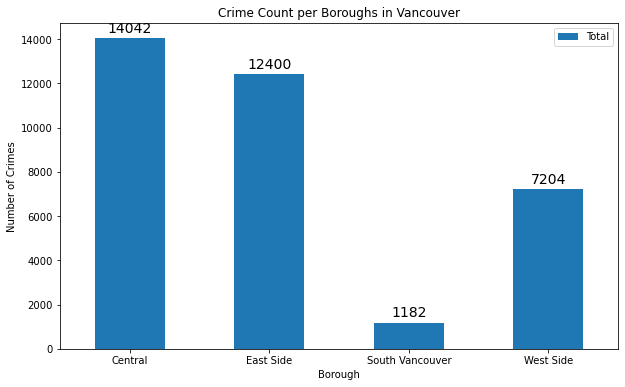

In [41]:
per_borough = van_crime_Type[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Crime Count per Boroughs in Vancouver')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [42]:
van_boroughs_crime['Borough'].value_counts()

Central            14042
East Side          12400
West Side           7204
South Vancouver     1182
Name: Borough, dtype: int64

## South Vancouver has very little number of neighborhoods, only 1182. So it looks like opening a commercial establishment would not be viable, we can choose the next borough with lowest crime which is West Side. It has 7204 neighborhoods. The rest two have much higher neighborhood count but then  the crime rate is also very high.

 # West Side is ideal destination for opening of commercial establishments.

## Section III : Using OpenCage Geocoder to find the safest borough and explore its neighborhood.

### Creating a new consolidated dataset of the chosen neighborhood : West Side, along with their boroughs, crime data and the respective neighborhood's co-ordinates. This data will be plotted on the maps using Folium and perform exploratory data analysis.

In [28]:
# Restricting the rows in the data frame to only those with West side as Borough

van_ws_neigh = van_boroughs_crime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
van_ws_neigh = van_ws_neigh[van_ws_neigh['Borough'] == 'West Side']
van_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighborhoods in West Side Borough =', len(van_ws_neigh['Neighborhood'].unique()))

van_ws_neigh['Neighborhood'].unique()

Number of Neighborhoods in West Side Borough = 10


array(['Shaughnessy', 'Fairview', 'Oakridge', 'Marpole', 'Kitsilano',
       'Kerrisdale', 'West Point Grey', 'Arbutus Ridge', 'South Cambie',
       'Dunbar-Southlands'], dtype=object)

In [29]:
# Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

Latitude = []
Longitude = []
Borough = []
Neighborhood = van_ws_neigh['Neighborhood'].unique()


key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighborhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighborhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

[49.2463051, 49.2619557, 49.2266149, 49.2092233, 49.2694099, 49.2209848, 49.2681022, 49.2463051, 49.2464639, 49.237864] [-123.1384051, -123.1304084, -123.1229433, -123.1361495, -123.155267, -123.1595484, -123.2026425, -123.159636, -123.1216027, -123.1843544]


In [33]:
# new Data Frame with neighborhoods in West Side Borough of Vancoouver along with centroid of their co-ordinates

ws_neig_dict = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighborhood,Borough,Latitude,Longitude
0,Shaughnessy,West Side,49.246305,-123.138405
1,Fairview,West Side,49.261956,-123.130408
2,Oakridge,West Side,49.226615,-123.122943
3,Marpole,West Side,49.209223,-123.136150
4,Kitsilano,West Side,49.269410,-123.155267
5,Kerrisdale,West Side,49.220985,-123.159548
6,West Point Grey,West Side,49.268102,-123.202642
7,Arbutus Ridge,West Side,49.246305,-123.159636
8,South Cambie,West Side,49.246464,-123.121603
9,Dunbar-Southlands,West Side,49.237864,-123.184354


In [34]:
#  Geographical co-ordiantes of Vancouver 

address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [2]:
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')

     |████████████████████████████████| 79 kB 5.0 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=87703b92d82ce5e750dae08177628d17bb69bfe920d0c2cceba4ea1a7883d3cf
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed


In [35]:
van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  
    
van_map

## Section IV :  Using Four Square API to explore the neighborhood venues and to apply machine learning algorithm to cluster the neighborhoods and present the findings by plotting it on maps using Folium.

### Creating a new consolidated dataset of the neighborhoods, boroughs, and the most common venues and the respective neighborhood along with co-ordinates.

In [37]:
CLIENT_ID = 'XVY0YGK3DX5QGHMN2TGSK2EWA55P3JNPIVC5QVW5SGIGUI2L'
CLIENT_SECRET = 'T53Z3HT4W5DVALRIPBK2DPD4NFOCISMUTMNBLNW13KEJTAIJ'
VERSION = '20191101'
LIMIT = 100

#Four Square Credentials

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: XVY0YGK3DX5QGHMN2TGSK2EWA55P3JNPIVC5QVW5SGIGUI2L
CLIENT_SECRET:T53Z3HT4W5DVALRIPBK2DPD4NFOCISMUTMNBLNW13KEJTAIJ


In [39]:
# Defining a function to fetch top 10 venues around a given neighborhood

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
print ('Top 10 venues around a given neighborhood')
van_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighborhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude'])

Top 10 venues around a given neighborhood
Shaughnessy
Fairview
Oakridge
Marpole
Kitsilano
Kerrisdale
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


In [46]:
print(van_ws_venues.shape)
print('Venues for each neighborhood in West Side')
van_ws_venues.head()

(158, 5)
Venues for each neighborhood in West Side


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Shaughnessy,49.246305,-123.138405,casumo canada,Video Game Store
1,Shaughnessy,49.246305,-123.138405,Bus Stop 58136 (10),Bus Stop
2,Shaughnessy,49.246305,-123.138405,Devonshire Park,Park
3,Shaughnessy,49.246305,-123.138405,Bus Stop 50209 (10),Bus Stop
4,Shaughnessy,49.246305,-123.138405,Bus Stop 50206 (10),Bus Stop


In [47]:
# Venue Count per neighborhood
van_ws_venues.groupby('Neighborhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighborhood,
Arbutus Ridge,9
Dunbar-Southlands,12
Fairview,18
Kerrisdale,4
Kitsilano,47
Marpole,33
Oakridge,8
Shaughnessy,6
South Cambie,14


In [48]:
print('There are {} uniques categories.'.format(len(van_ws_venues['Venue Category'].unique())))

There are 79 uniques categories.


### Modeling

### One Hot Encoding to Analyze Each Neighborhood

In [50]:
# one hot encoding
van_onehot = pd.get_dummies(van_ws_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
van_onehot['Neighborhood'] = van_ws_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [van_onehot.columns[-1]] + list(van_onehot.columns[:-1])
van_onehot = van_onehot[fixed_columns]

van_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Breakfast Spot,Bubble Tea Shop,...,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Yoga Studio
0,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
van_onehot.shape

(158, 80)

In [52]:
van_ws_grouped = van_onehot.groupby('Neighborhood').mean().reset_index()
van_ws_grouped

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Breakfast Spot,Bubble Tea Shop,...,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.111111,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000
3,Kerrisdale,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kitsilano,0.042553,0.021277,0.000000,0.063830,0.000000,0.000000,0.021277,0.021277,0.000000,...,0.042553,0.000000,0.021277,0.021277,0.042553,0.021277,0.000000,0.000000,0.000000,0.021277
5,Marpole,0.000000,0.000000,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.060606,...,0.090909,0.030303,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.000000
6,Oakridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000
7,Shaughnessy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
8,South Cambie,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,West Point Grey,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
van_ws_grouped.shape

(10, 80)

### Top 10 most common venues across neighborhoods

In [56]:
num_top_venues = 10

for hood in van_ws_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = van_ws_grouped[van_ws_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
                  venue  freq
0         Shopping Mall  0.22
1          Liquor Store  0.11
2        Discount Store  0.11
3                Bakery  0.11
4        Sandwich Place  0.11
5           Coffee Shop  0.11
6    Seafood Restaurant  0.11
7  Fast Food Restaurant  0.11
8    Physical Therapist  0.00
9                   Pub  0.00


----Dunbar-Southlands----
                  venue  freq
0         Grocery Store  0.25
1          Liquor Store  0.17
2  Gym / Fitness Center  0.08
3   Japanese Restaurant  0.08
4           Coffee Shop  0.08
5             Pet Store  0.08
6              Bus Stop  0.08
7                  Café  0.08
8                   Gym  0.08
9              Pharmacy  0.00


----Fairview----
                 venue  freq
0          Coffee Shop  0.11
1     Asian Restaurant  0.11
2  Japanese Restaurant  0.11
3   Salon / Barbershop  0.06
4   Physical Therapist  0.06
5             Pharmacy  0.06
6            Pet Store  0.06
7         Camera Store  0.06
8         

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = van_ws_grouped['Neighborhood']

for ind in np.arange(van_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(van_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Shopping Mall,Coffee Shop,Bakery,Liquor Store,Discount Store,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Yoga Studio,French Restaurant
1,Dunbar-Southlands,Grocery Store,Liquor Store,Japanese Restaurant,Gym,Coffee Shop,Pet Store,Café,Bus Stop,Gym / Fitness Center,Greek Restaurant
2,Fairview,Asian Restaurant,Coffee Shop,Japanese Restaurant,Korean Restaurant,Physical Therapist,Pet Store,Park,Restaurant,Salon / Barbershop,Nail Salon
3,Kerrisdale,Pool,Park,Café,Golf Course,Disc Golf,Discount Store,Falafel Restaurant,Fast Food Restaurant,Food Truck,French Restaurant
4,Kitsilano,Bakery,American Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,Ice Cream Shop,French Restaurant,Coffee Shop,Food Truck,Clothing Store


### Cluster Neighbourhoods

In [64]:

kclusters = 5 # set number of clusters

van_grouped_clustering = van_ws_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(van_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 2, 0, 2, 2, 2, 3, 2, 4], dtype=int32)

### Adding clustering labels

In [ ]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # add clustering labels

vancouver_merged = ws_neig_geo


vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood') # merge data to add latitude/longitude for each neighborhood

In [68]:
vancouver_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaughnessy,West Side,49.246305,-123.138405,3,Bus Stop,Video Game Store,Chocolate Shop,Park,Yoga Studio,Gas Station,Discount Store,Falafel Restaurant,Fast Food Restaurant,Food Truck
1,Fairview,West Side,49.261956,-123.130408,2,Asian Restaurant,Coffee Shop,Japanese Restaurant,Korean Restaurant,Physical Therapist,Pet Store,Park,Restaurant,Salon / Barbershop,Nail Salon
2,Oakridge,West Side,49.226615,-123.122943,2,Coffee Shop,Sushi Restaurant,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop,Bubble Tea Shop,Vietnamese Restaurant,Light Rail Station,Gym,Disc Golf
3,Marpole,West Side,49.209223,-123.136150,2,Pizza Place,Sushi Restaurant,Bubble Tea Shop,Chinese Restaurant,Japanese Restaurant,Massage Studio,Noodle House,Dessert Shop,Coffee Shop,Falafel Restaurant
4,Kitsilano,West Side,49.269410,-123.155267,2,Bakery,American Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,Ice Cream Shop,French Restaurant,Coffee Shop,Food Truck,Clothing Store


### Create Map

In [69]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12) # create map

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

 ### Analysing  the resulting Clusters

### Grocery Store in only 2 clusters with lots of other joints around.

### Cluster  # 1

In [70]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,West Side,Pool,Park,Café,Golf Course,Disc Golf,Discount Store,Falafel Restaurant,Fast Food Restaurant,Food Truck,French Restaurant


In [75]:
print('No Groceries in top 10')

No Groceries in top 10


### Cluster  # 2

In [71]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,West Side,Grocery Store,Liquor Store,Japanese Restaurant,Gym,Coffee Shop,Pet Store,Café,Bus Stop,Gym / Fitness Center,Greek Restaurant


### Cluster # 3

In [72]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Asian Restaurant,Coffee Shop,Japanese Restaurant,Korean Restaurant,Physical Therapist,Pet Store,Park,Restaurant,Salon / Barbershop,Nail Salon
2,West Side,Coffee Shop,Sushi Restaurant,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop,Bubble Tea Shop,Vietnamese Restaurant,Light Rail Station,Gym,Disc Golf
3,West Side,Pizza Place,Sushi Restaurant,Bubble Tea Shop,Chinese Restaurant,Japanese Restaurant,Massage Studio,Noodle House,Dessert Shop,Coffee Shop,Falafel Restaurant
4,West Side,Bakery,American Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,Ice Cream Shop,French Restaurant,Coffee Shop,Food Truck,Clothing Store
7,West Side,Shopping Mall,Coffee Shop,Bakery,Liquor Store,Discount Store,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Yoga Studio,French Restaurant
8,West Side,Coffee Shop,Malay Restaurant,Park,Café,Cafeteria,Bus Stop,Shopping Mall,Sushi Restaurant,Gift Shop,Grocery Store


### Cluster # 4

In [73]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Bus Stop,Video Game Store,Chocolate Shop,Park,Yoga Studio,Gas Station,Discount Store,Falafel Restaurant,Fast Food Restaurant,Food Truck


### Cluster # 5

In [74]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,West Side,Park,Disc Golf,Harbor / Marina,Gym / Fitness Center,Gym,Sandwich Place,Performing Arts Venue,Yoga Studio,Discount Store,Falafel Restaurant
